In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"E:\\zDeep Learning\\Project\\02 Graduate Admission Prediction using ANN\\Admission_Predict_Ver1.1.csv")

In [37]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [38]:
df.shape

(500, 9)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
df.drop(columns="Serial No.", inplace=True)

In [42]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size=0.2, random_state=1)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [46]:
model = Sequential()

model.add(Dense(7,activation='relu', input_dim = 7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

e:\zDeep Learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [49]:
history = model.fit(X_train_scaled, y_train, epochs=500, validation_split=0.2)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.5722 - val_loss: 0.5914
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5080 - val_loss: 0.5247
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4464 - val_loss: 0.4557
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3779 - val_loss: 0.3777
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3057 - val_loss: 0.2998
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2350 - val_loss: 0.2258
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1705 - val_loss: 0.1580
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1125 - val_loss: 0.1021
Epoch 9/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0690 - val_loss: 0.0603
Epoch 10/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0390 - val_loss: 0.0335
Epoch 11/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0217 - val_loss: 0.0193
Epoch 12/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - 

In [50]:
y_pred = model.predict(X_test_scaled)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001B094109E10> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8137421595518515

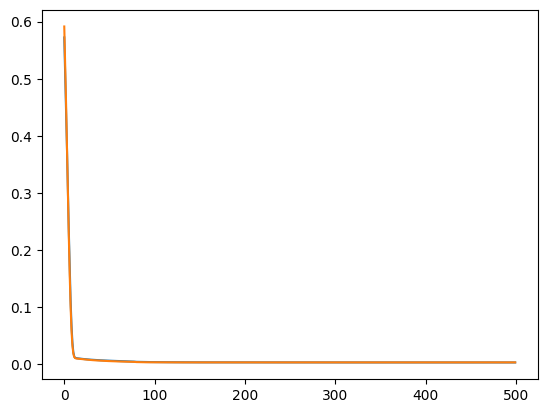

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])